# Import Libraries and Data

In [ ]:
from google.colab import drive
drive.flush_and_unmount('/content/drive')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [1]:
# Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV, calibration_curve

In [40]:
# Loading Dataset
raw_data = pd.read_csv("/content/cleaned_dataset.csv")
raw_data.head()

,Unnamed: 0,Hospital Mortality,Age,Gender,Uncomplicated Hypertension,Complicated Hypertension,Uncomplicated Diabetes,Complicated Diabetes,Malignancy,Hematologic Disease,...,Min BUN,Mean BUN,Max Creatinine,Min Creatinine,Mean Creatinine,Max Hemoglobin,Min Hemoglobin,Mean Hemoglobin,Ventilation Duration (h),RRT
0,0,0,77,1,0,0,0,0,0,0,...,41.0,44.75,3.2,2.4,2.65,12.8,7.8,10.04,83.733333,0
1,1,1,42,1,1,0,0,0,0,0,...,16.0,16.50,1.4,1.2,1.30,15.4,12.9,14.10,118.333333,0
2,2,1,72,1,1,0,0,0,0,0,...,28.0,33.50,1.7,1.3,1.50,13.3,7.8,10.23,82.666667,0
3,3,0,40,0,1,0,1,0,0,0,...,13.0,15.33,0.8,0.5,0.63,12.3,7.9,10.88,6.816667,0
4,4,0,47,0,0,0,0,0,0,0,...,10.0,10.50,0.8,0.7,0.75,13.7,9.1,10.77,0.833333,0


# Data Preparation

In [41]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16079 entries, 0 to 16078
Data columns (total 68 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             16079 non-null  int64  
 1   Hospital Mortality                     16079 non-null  int64  
 2   Age                                    16079 non-null  int64  
 3   Gender                                 16079 non-null  int64  
 4   Uncomplicated Hypertension             16079 non-null  int64  
 5   Complicated Hypertension               16079 non-null  int64  
 6   Uncomplicated Diabetes                 16079 non-null  int64  
 7   Complicated Diabetes                   16079 non-null  int64  
 8   Malignancy                             16079 non-null  int64  
 9   Hematologic Disease                    16079 non-null  int64  
 10  Metastasis                             16079 non-null  int64  
 11  Pe

No missing values, all correct datatype, CHECK.

In [42]:
raw_data['Hospital Mortality'].value_counts()

0    13656
1     2423
Name: Hospital Mortality, dtype: int64

In [43]:
# print(f"The data is unbalanced with {3017/(3017+15866)*100:.1f}% mortality rate.")
print(f"The data is unbalanced with {2423/(2423+13656)*100:.1f}% mortality rate.")

The data is unbalanced with 15.1% mortality rate.


In [44]:
# Convert Gender from Str to Numeric
raw_data['Gender'] = pd.get_dummies(raw_data['Gender'], drop_first = True)

In [45]:
raw_data.columns

Index(['Unnamed: 0', 'Hospital Mortality', 'Age', 'Gender',
       'Uncomplicated Hypertension', 'Complicated Hypertension',
       'Uncomplicated Diabetes', 'Complicated Diabetes', 'Malignancy',
       'Hematologic Disease', 'Metastasis', 'Peripheral Vascular Disease',
       'Hypothyroidism', 'Chronic Heart Failure', 'Stroke', 'Liver Disease',
       'SAPS II', 'SOFA', 'OASIS', 'Sepsis', 'Any Organ Failure',
       'Severe Respiratory Failure', 'Severe Coagulation Failure',
       'Severe Liver Failure', 'Severe Cardiovascular Failure',
       'Severe Central Nervous System Failure', 'Severe Renal Failure',
       'Respiratory Dysfunction', 'Cardiovascular Dysfunction',
       'Renal Dysfunction', 'Hematologic Dysfunction', 'Metabolic Dysfunction',
       'Neurologic Dysfunction', 'Max Heart Rate', 'Min Heart Rate',
       'Mean Heart Rate', 'Max MAP', 'Min MAP', 'Mean MAP',
       'Max Systolic Pressure', 'Min Systolic Pressure',
       'Mean Systolic Pressure', 'Max Diastolic Press

In [46]:
features = ['Age', 'Gender', 'Uncomplicated Hypertension',
       'Complicated Hypertension', 'Uncomplicated Diabetes',
       'Complicated Diabetes', 'Malignancy', 'Hematologic Disease',
       'Metastasis', 'Peripheral Vascular Disease', 'Hypothyroidism',
       'Chronic Heart Failure', 'Stroke', 'Liver Disease', 'SAPS II', 'SOFA',
       'OASIS', 'Sepsis', 'Any Organ Failure', 'Severe Respiratory Failure',
       'Severe Coagulation Failure', 'Severe Liver Failure',
       'Severe Cardiovascular Failure',
       'Severe Central Nervous System Failure', 'Severe Renal Failure',
       'Respiratory Dysfunction', 'Cardiovascular Dysfunction',
       'Renal Dysfunction', 'Hematologic Dysfunction', 'Metabolic Dysfunction',
       'Neurologic Dysfunction', 'Max Heart Rate', 'Min Heart Rate',
       'Mean Heart Rate', 'Max MAP', 'Min MAP', 'Mean MAP',
       'Max Systolic Pressure', 'Min Systolic Pressure',
       'Mean Systolic Pressure', 'Max Diastolic Pressure',
       'Min Diastolic Pressure', 'Mean Diastolic Pressure', 'Max Temperature',
       'Min Temperature', 'Mean Temperature', 'Max pH', 'Min pH', 'Mean pH', 'Max Glucose',
       'Min Glucose', 'Mean Glucose', 'Max WBC', 'Min WBC', 'Mean WBC',
       'Max BUN', 'Min BUN', 'Mean BUN', 'Max Creatinine', 'Min Creatinine',
       'Mean Creatinine', 'Max Hemoglobin', 'Min Hemoglobin',
       'Mean Hemoglobin']

We removed the Latate columns, so we also remove it here.

In [47]:
X = raw_data[features]
y = raw_data['Hospital Mortality']

In [48]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [49]:
type(X_train)
X_train.shape

(11255, 64)

In [50]:
# Undersampling the training set
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

y_train_rus.value_counts()

0    1686
1    1686
Name: Hospital Mortality, dtype: int64

In [ ]:
#Undersampling the test set

In [51]:
rus = RandomUnderSampler(random_state=42)
X_test_rus, y_test_rus= rus.fit_resample(X_test, y_test)

y_test_rus.value_counts()

0    737
1    737
Name: Hospital Mortality, dtype: int64

# Random Forest Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]

## Untuned Model with all features

### Balanced Data - Undersampling technique

In [57]:
# Creating a Random Forest Model
rfc = RandomForestClassifier()

# Model Training
rfc_rus = rfc.fit(X_train_rus, y_train_rus)

# Get Prediction Values
y_pred_rus_untun_all = rfc_rus.predict(X_test_rus)
y_prob_untun_all = rfc_rus.predict_proba(X_test_rus)
print("Accuracy:",metrics.accuracy_score(y_test_rus, y_pred_rus_untun_all))

Accuracy: 0.7808683853459973


Accuracy dropped from 0.87 => 0.77

#### Classification report

In [89]:
print("Classification Report All Features: Balanced Data & Uncalibrated")
print(classification_report(y_test_rus, y_pred_rus_untun_all, target_names = ['Survival', 'Death']))

Classification Report All Features: Balanced Data & Uncalibrated
              precision    recall  f1-score   support

    Survival       0.81      0.74      0.77       737
       Death       0.76      0.82      0.79       737

    accuracy                           0.78      1474
   macro avg       0.78      0.78      0.78      1474
weighted avg       0.78      0.78      0.78      1474



## Tuned model with all features


### Grid Search


In [ ]:
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [50, 100, 250, 500],
    "min_samples_split": range(2, 5),
    "min_samples_leaf": range(1, 4)
}

search_rus = GridSearchCV(rfc_rus, params, n_jobs = -1, cv = 10, verbose = 2)

search_rus.fit(X_train_rus, y_train_rus)

# GridSearchCV results
print("tuned hpyerparameters: (best parameters)", search_rus.best_params_)
print("accuracy :", search_rus.best_score_)


Fitting 10 folds for each of 108 candidates, totalling 1080 fits
tuned hpyerparameters: (best parameters) {'criterion': 'log_loss', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
accuracy : 0.7938721401857671


In [54]:
# In case I lose the grid search results above
# fit the best hyperparameter in the data
# search_rus = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, min_samples_split = 3, min_samples_leaf = 3)
search_rus = RandomForestClassifier(criterion = 'log_loss', n_estimators = 100, min_samples_split = 2, min_samples_leaf = 1)
search_rus = search_rus.fit(X_train_rus, y_train_rus)

In [59]:
y_pred_tun_all = search_rus.predict(X_test_rus)
y_prob_tun_all = search_rus.predict_proba(X_test_rus)
y_prob_rus = search_rus.predict_proba(X_test_rus)

#### Classification report

In [90]:
print("Classification Report All Features: Balanced Data & Calibrated")
print(classification_report(y_test_rus, y_pred_tun_all, target_names = ['Survival', 'Death']))

Classification Report All Features: Balanced Data & Calibrated
              precision    recall  f1-score   support

    Survival       0.81      0.76      0.78       737
       Death       0.77      0.82      0.80       737

    accuracy                           0.79      1474
   macro avg       0.79      0.79      0.79      1474
weighted avg       0.79      0.79      0.79      1474



## With selected features

In [62]:
### SELECTED FEATURES data
selected_feat_imb = [
    'SAPS II', 'SOFA', 'OASIS', 'Age',
    'Min Heart Rate', 'Mean Heart Rate', 'Min Diastolic Pressure', 'Min pH', 'Mean pH', 'Min Glucose',
    'Min WBC', 'Min BUN', 'Max Creatinine', 'Max Hemoglobin',
    'Min Hemoglobin', 'Uncomplicated Hypertension', 'Uncomplicated Diabetes', 'Complicated Diabetes',
    'Metastasis', 'Stroke', 'Sepsis', 'Any Organ Failure',
    'Severe Cardiovascular Failure', 'Severe Renal Failure', 'Respiratory Dysfunction', 'Cardiovascular Dysfunction',
    'Hematologic Dysfunction'
    ]

### Untuned model with 29 features

In [64]:
# Creating a Random Forest Model
rfc = RandomForestClassifier()

# Model Training
rfc_rus_29 = rfc.fit(X_train_rus, y_train_rus)

# Get Prediction Values
y_pred_rus_untun_29 = rfc_rus_29.predict(X_test_rus)
y_prob_untun_29 = rfc_rus_29.predict_proba(X_test_rus)

print("Accuracy:",metrics.accuracy_score(y_test_rus, y_pred_rus))

Accuracy: 0.7781546811397557


#### Classification Report

In [91]:
print("Classification Report 29 Features: Balanced Data & Uncalibrated")
print(classification_report(y_test_rus, y_pred_rus_untun_29, target_names = ['Survival', 'Death']))

Classification Report 29 Features: Balanced Data & Uncalibrated
              precision    recall  f1-score   support

    Survival       0.79      0.75      0.77       737
       Death       0.76      0.81      0.78       737

    accuracy                           0.78      1474
   macro avg       0.78      0.78      0.78      1474
weighted avg       0.78      0.78      0.78      1474



### Tuned model with 29 features

In [86]:
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [50, 100, 250, 500],
    "min_samples_split": range(2, 5),
    "min_samples_leaf": range(1, 4)
}

search_rus_29 = GridSearchCV(rfc_rus, params, n_jobs = -1, cv = 10, verbose = 2)

search_rus_29.fit(X_train_rus, y_train_rus)

# GridSearchCV results
print("tuned hpyerparameters: (best parameters)", search_rus_29.best_params_)
print("accuracy :", search_rus_29.best_score_)


Fitting 10 folds for each of 108 candidates, totalling 1080 fits
tuned hpyerparameters: (best parameters) {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500}
accuracy : 0.7894281249451301


In [79]:
# In case I lose the grid search results above
# fit the best hyperparameter in the data
# search_rus = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, min_samples_split = 3, min_samples_leaf = 3)
search_rus_29 = RandomForestClassifier(criterion = 'entropy', n_estimators = 250, min_samples_split = 4, min_samples_leaf = 2)
search_rus_29 = search_rus_29.fit(X_train_rus, y_train_rus)

In [83]:
y_pred_tun_29 = search_rus_29.predict(X_test_rus)
y_prob_tun_29 = search_rus_29.predict_proba(X_test_rus)
y_prob_rus = search_rus_29.predict_proba(X_test_rus)

#### Classification Report

In [92]:
print("Classification Report 29 features: Balanced Data & Calibrated")
print(classification_report(y_test_rus, y_pred_tun_29, target_names = ['Survival', 'Death']))

Classification Report 29 features: Balanced Data & Calibrated
              precision    recall  f1-score   support

    Survival       0.81      0.75      0.78       737
       Death       0.77      0.82      0.79       737

    accuracy                           0.79      1474
   macro avg       0.79      0.79      0.79      1474
weighted avg       0.79      0.79      0.79      1474



# Results from Best Models

In [24]:
y_prob_tun_all = search_rus.predict_proba(X_test_rus)
y_prob_rus = search_rus.predict_proba(X_test_rus)

In [57]:
# GridSearchCV results

print(y_prob_tun_all)
print(y_prob_rus)

[0 0 0 ... 0 1 1]
[[0.75 0.25]
 [0.5  0.5 ]
 [0.81 0.19]
 ...
 [0.55 0.45]
 [0.46 0.54]
 [0.18 0.82]]


In [17]:
# if the prop higher or equal than 0.5 then 1, lower than 0.5 then 0
# y_pred_prob = np.where(y_prob >= 0.5, 1, 0)

# print(y_pred_prob)
y_pred_prob = []
for x in y_prob_rus:
  if x[1] >= 0.5:
    y_pred_prob.append(1)
  else:
    y_pred_prob.append(0)

print(y_pred_prob)

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

## Visualization of one decision tree

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = search_rus.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = search_rus.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = features, class_names=['0','1'] , rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

## Extract the error prediction

In [ ]:
## Case un tun model
# Add actual column to Test dataset
error_dataset = X_test_rus
# print(error_dataset)
error_dataset['Hospital Mortality'] = y_test_rus
error_dataset['Predicted'] = y_pred_rus_untun_all
full_dataset_with_prediction = error_dataset
error_dataset.to_csv('full_dataset_with_prediction.csv', index=False)

error_dataset = error_dataset[error_dataset['Hospital Mortality']!=error_dataset['Predicted']]
print(error_dataset)
error_dataset.to_csv('incorrect_predictions_allfeatures.csv', index=False)

      Age  Gender  Uncomplicated Hypertension  Complicated Hypertension  \
1      24       0                           0                         0   
4      36       1                           1                         0   
10     70       1                           0                         0   
12     56       0                           0                         0   
13     79       1                           0                         0   
...   ...     ...                         ...                       ...   
1439   75       1                           0                         0   
1448   48       0                           0                         0   
1453   56       1                           1                         0   
1462   69       0                           1                         0   
1471   22       1                           0                         0   

      Uncomplicated Diabetes  Complicated Diabetes  Malignancy  \
1                          0     

In [ ]:
## Case tuned model
# Add actual column to Test dataset
error_dataset_tunned_1 = X_test_rus
# print(error_dataset)
error_dataset_tunned_1['Hospital Mortality'] = y_test_rus
error_dataset_tunned_1['Predicted'] = y_prob_tun_all
error_dataset_tunned_1.to_csv('full_dataset_with_prediction_a.csv', index=False)
# error_dataset_tunned = error_dataset_tunned[error_dataset_tunned['Actual'] != error_dataset_tunned['Predicted']]
print(error_dataset_tunned_1.head())
# error_dataset_tunned.to_csv('incorrect_predictions_allfeatures_tunned.csv', index=False)

   Age  Gender  Uncomplicated Hypertension  Complicated Hypertension  \
0   65       1                           1                         0   
1   24       0                           0                         0   
2   76       1                           1                         0   
3   53       1                           0                         0   
4   36       1                           1                         0   

   Uncomplicated Diabetes  Complicated Diabetes  Malignancy  \
0                       1                     0           0   
1                       0                     0           0   
2                       1                     0           0   
3                       0                     0           1   
4                       1                     0           0   

   Hematologic Disease  Metastasis  Peripheral Vascular Disease  ...  Min BUN  \
0                    0           0                            0  ...     18.0   
1                    1    

## Confusion Matrix


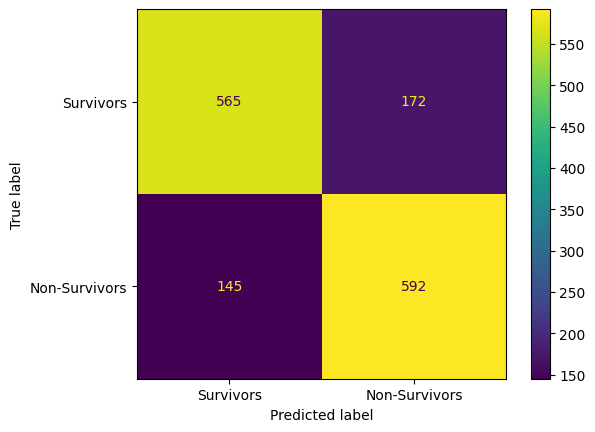

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Untuned model
confusion_matrix(y_test_rus, y_prob_tun_all)
# print(confusion_matrix)

# visualize confusion matrix with sklearn metrics
# define matrix and create labels
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_rus, y_prob_tun_all), display_labels = ["Survivors", "Non-Survivors"])

# display matrix
cm_display.plot()
plt.show()


## 2. ROC Curves

In [ ]:
# AUC score
rus_auc = roc_auc_score(y_test_rus, y_prob_rus[:,1])
print(f"For the best models: \nBalanced Data AUC = {rus_auc}")

For the best models: 
Balanced Data AUC = 0.8752377252751906


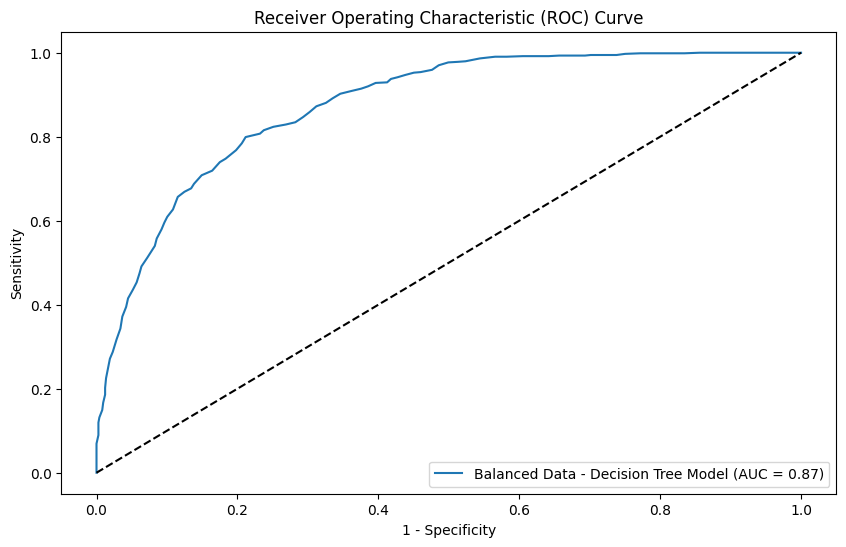

In [59]:
# fpr - false positive rate
# tpr - true positive rate
# threshold - part of the decision function used to calculate fpr and tpr

fpr_rus, tpr_rus, threshold_rus = roc_curve(y_test_rus, y_prob_rus[:,1])


plt.figure(figsize = (10, 6))

plt.plot(fpr_rus, tpr_rus, label = f'Balanced Data - Decision Tree Model (AUC = {rus_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random classifier

plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')

plt.show()

### Find optimal threshold

In [ ]:
# Ref: https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
# calculate the g-mean for each threshold
import numpy as np
gmeans = np.sqrt(tpr_rus * (1-fpr_rus))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold_rus[int(ix)], gmeans[int(ix)]))

Best Threshold=0.480000, G-Mean=0.788


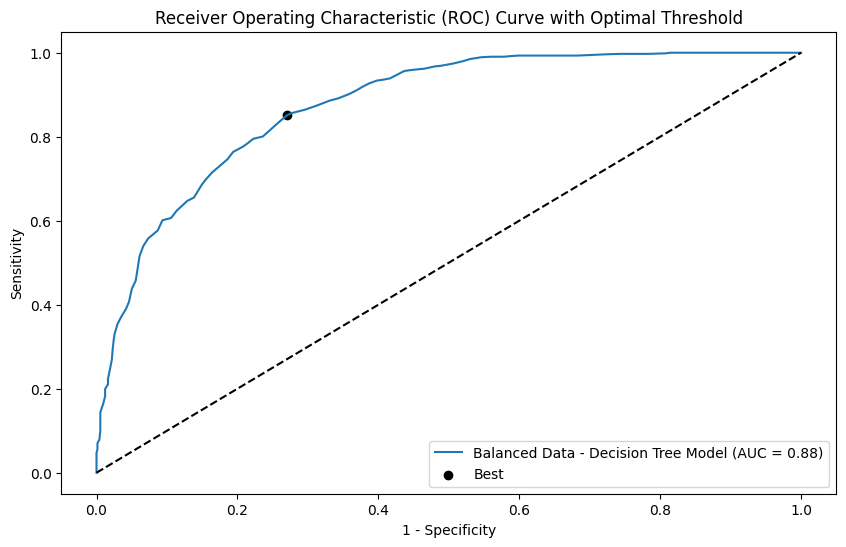

In [ ]:
plt.figure(figsize = (10, 6))

plt.plot(fpr_rus, tpr_rus, label = f'Balanced Data - Decision Tree Model (AUC = {rus_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random classifier
plt.scatter(fpr_rus[ix], tpr_rus[ix], marker='o', color='black', label='Best')

plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve with Optimal Threshold')
plt.legend(loc = 'lower right')

plt.show()

## 3. Classification Reports

In [25]:
y_pred_rus = search_rus.predict(X_test_rus)

In [38]:
print("Classification Report: Balanced Data & Uncalibrated")
print(classification_report(y_test_rus, y_pred_rus, target_names = ['Survival', 'Death']))

Classification Report: Balanced Data & Uncalibrated
              precision    recall  f1-score   support

    Survival       0.80      0.74      0.77       737
       Death       0.76      0.81      0.79       737

    accuracy                           0.78      1474
   macro avg       0.78      0.78      0.78      1474
weighted avg       0.78      0.78      0.78      1474



## 4. Importance Graphs All Features

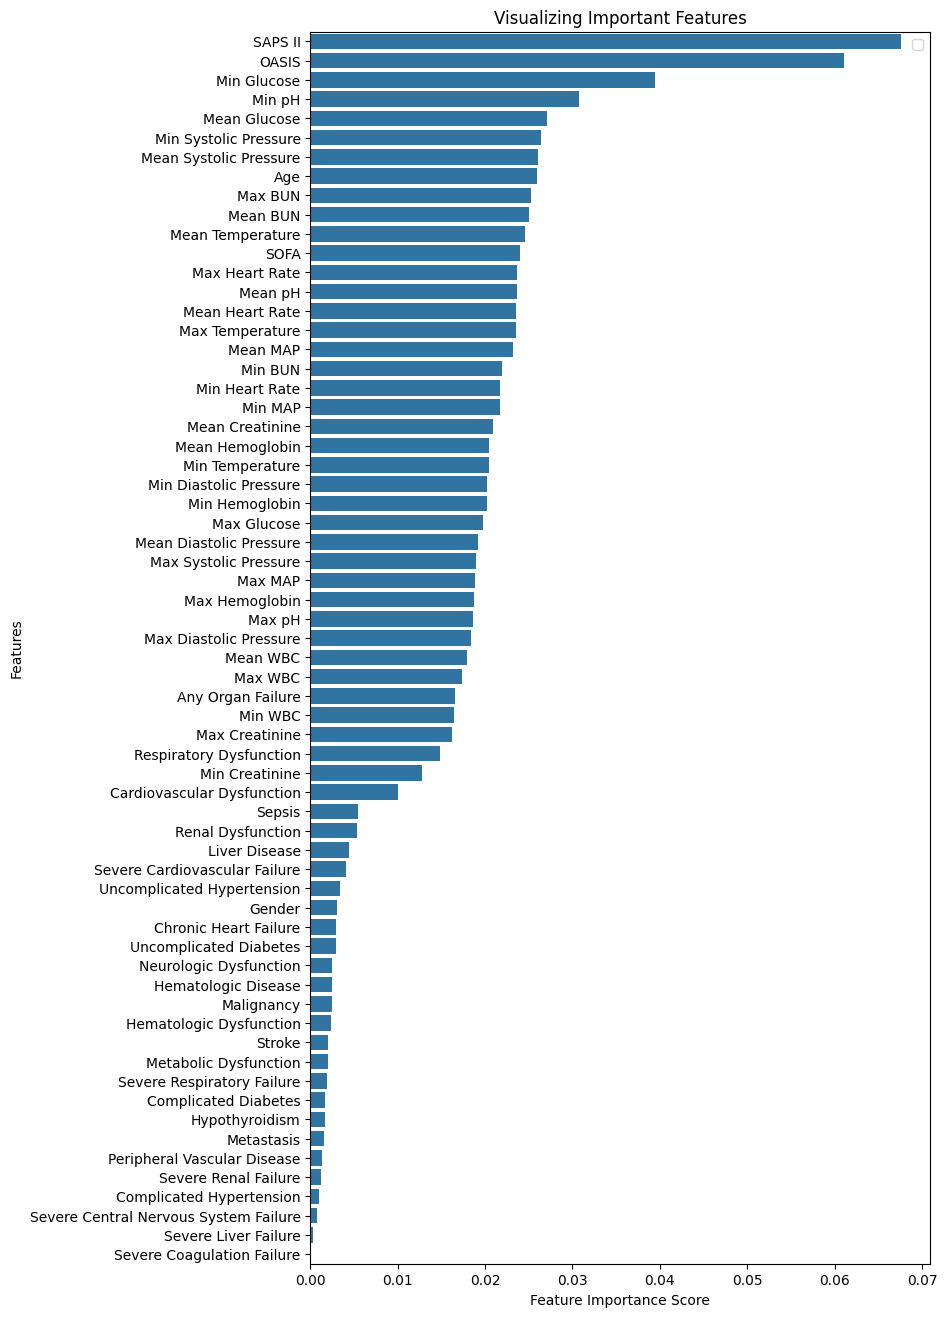

In [ ]:
feature_imp = pd.Series(search_rus.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

plt.figure(figsize = (8, 16))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# ROC curve from multiple model

<Figure size 640x480 with 0 Axes>

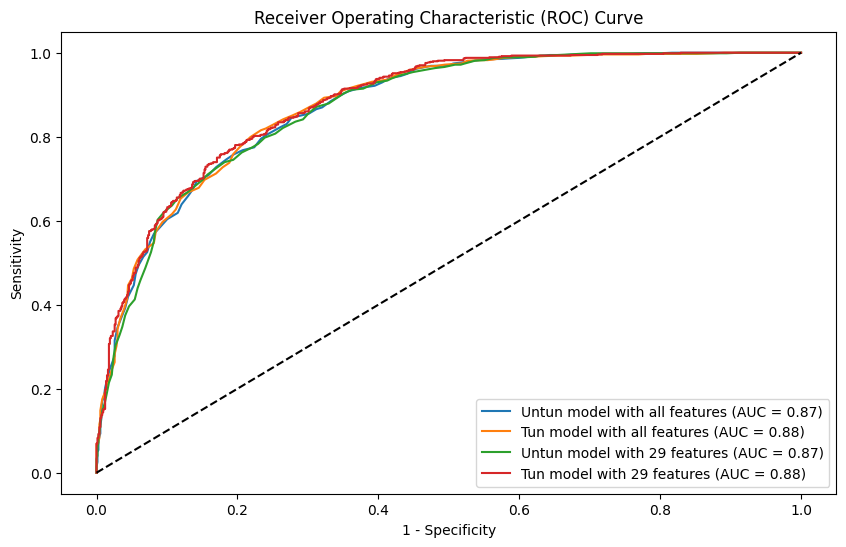

In [88]:
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize = (10, 6))

#Un-tun model with all features
rus_auc_untun_all = roc_auc_score(y_test_rus, y_prob_untun_all[:,1])
fpr_rus_untun_all, tpr_rus_untun_all, threshold_rus_untun_all = roc_curve(y_test_rus, y_prob_untun_all[:,1])
plt.plot(fpr_rus_untun_all, tpr_rus_untun_all,label=f'Untun model with all features (AUC = {rus_auc_untun_all:.2f})')

#Tun model with all features
rus_auc_tun_all = roc_auc_score(y_test_rus, y_prob_tun_all[:,1])
fpr_rus_tun_all, tpr_rus_tun_all, threshold_rus_tun_all = roc_curve(y_test_rus, y_prob_tun_all[:,1])
plt.plot(fpr_rus_tun_all, tpr_rus_tun_all,label=f'Tun model with all features (AUC = {rus_auc_tun_all:.2f})')

#Un-tun model with 29 features
rus_auc_untun_29 = roc_auc_score(y_test_rus, y_prob_untun_29[:,1])
fpr_rus_untun_29, tpr_rus_untun_29, threshold_rus_untun_29 = roc_curve(y_test_rus, y_prob_untun_29[:,1])
plt.plot(fpr_rus_untun_29, tpr_rus_untun_29,label=f'Untun model with 29 features (AUC = {rus_auc_untun_29:.2f})')

#Tun model with 29 features
rus_auc_tun_29 = roc_auc_score(y_test_rus, y_prob_tun_29[:,1])
fpr_rus_tun_29, tpr_rus_tun_29, threshold_rus_tun_29 = roc_curve(y_test_rus, y_prob_tun_29[:,1])
plt.plot(fpr_rus_tun_29, tpr_rus_tun_29,label=f'Tun model with 29 features (AUC = {rus_auc_tun_29:.2f})')


plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random classifier

plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')

plt.show()